## Basic Statistics Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## BUSINESS PROBLEM-1

In [3]:
loan_data = pd.read_csv("LoansData.csv")
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
loan_data.columns = loan_data.columns.str.replace(".","_")

C:\Users\pawan\AppData\Local\Temp\ipykernel_13340\1531073932.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_data.columns = loan_data.columns.str.replace(".","_")


In [5]:
 loan_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [7]:
## we have to remove the % sign from Interest_Rate column
loan_data['Interest_Rate_in_percent'] = loan_data['Interest_Rate'].str.rstrip('%')

In [8]:
## remove 'months' from Loan_Length column
loan_data['Loan_duration_in_months'] = loan_data.Loan_Length.str.rstrip("months")

In [9]:
loan_data['Debt_To_Income_Ratio'] = loan_data['Debt_To_Income_Ratio'].str.rstrip('%')

In [10]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate_in_percent,Loan_duration_in_months
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,36
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,36


In [11]:
loan_data.drop(columns = ['Interest_Rate', 'Loan_Length'], inplace = True)

In [12]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate_in_percent,Loan_duration_in_months
0,20000.0,20000.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,36
1,19200.0,19200.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,36


In [13]:
loan_data.Interest_Rate_in_percent = loan_data.Interest_Rate_in_percent.astype('float')
loan_data.Loan_duration_in_months = loan_data.Loan_duration_in_months.astype('int')
loan_data.Debt_To_Income_Ratio = loan_data.Debt_To_Income_Ratio.astype('float')

In [14]:
loan_data.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
Interest_Rate_in_percent           2
Loan_duration_in_months            0
dtype: int64

In [15]:
loan_data.Employment_Length.loc[np.where(loan_data.Employment_Length.isna() == True)]

91      NaN
92      NaN
105     NaN
111     NaN
116     NaN
       ... 
2334    NaN
2423    NaN
2449    NaN
2465    NaN
2491    NaN
Name: Employment_Length, Length: 77, dtype: object

In [16]:
loan_data.Employment_Length.loc[~loan_data.Employment_Length.isna()]

0        < 1 year
1         2 years
2         2 years
3         5 years
4         9 years
          ...    
2495      8 years
2496    10+ years
2497    10+ years
2498      5 years
2499    10+ years
Name: Employment_Length, Length: 2423, dtype: object

In [17]:
loan_data.Amount_Requested.loc[loan_data.Amount_Requested.isna()]

2487   NaN
Name: Amount_Requested, dtype: float64

In [18]:
loan_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'Monthly_Income',
       'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length',
       'Interest_Rate_in_percent', 'Loan_duration_in_months'],
      dtype='object')

In [19]:
columns = ['Amount_Requested', 'Amount_Funded_By_Investors', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'State', 'Home_Ownership', 'Monthly_Income',
       'FICO_Range', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months',
       'Interest_Rate_in_percent', 'Loan_duration_in_months']

In [20]:
loan_data.dropna(axis = 0, subset = columns, inplace = True)

In [21]:
loan_data.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Loan_Purpose                       0
Debt_To_Income_Ratio               0
State                              0
Home_Ownership                     0
Monthly_Income                     0
FICO_Range                         0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                 76
Interest_Rate_in_percent           0
Loan_duration_in_months            0
dtype: int64

In [22]:
## check for the duplicate data
loan_data.duplicated().sum()

0

In [23]:
loan_data_catagorical = loan_data.select_dtypes("object")
loan_data_catagorical.describe()

,Loan_Purpose,State,Home_Ownership,FICO_Range,Employment_Length
count,2489,2489,2489,2489,2413
unique,14,46,4,38,11
top,debt_consolidation,CA,MORTGAGE,670-674,10+ years
freq,1301,430,1144,170,649


In [24]:
loan_data_continuous = loan_data.select_dtypes("number")
loan_data_continuous.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount_Requested,2489.0,12409.923664,7806.747204,1000.00,6000.00,10000.00,17000.00,35000.00
Amount_Funded_By_Investors,2489.0,12004.754154,7748.534444,-0.01,6000.00,10000.00,16000.00,35000.00
Debt_To_Income_Ratio,2489.0,15.382186,7.507152,0.00,9.75,15.32,20.69,34.91
Monthly_Income,2489.0,5685.247300,3965.797049,588.50,3466.67,5000.00,6800.00,102750.00
Open_CREDIT_Lines,2489.0,10.074327,4.509246,2.00,7.00,9.00,13.00,38.00
Revolving_CREDIT_Balance,2489.0,15220.402170,18297.668558,0.00,5561.00,10944.00,18898.00,270800.00
Inquiries_in_the_Last_6_Months,2489.0,0.905585,1.231750,0.00,0.00,0.00,1.00,9.00
Interest_Rate_in_percent,2489.0,13.070912,4.177385,5.42,10.16,13.11,15.80,24.89
Loan_duration_in_months,2489.0,41.284050,9.946646,36.00,36.00,36.00,36.00,60.00


<Figure size 2000x800 with 0 Axes>

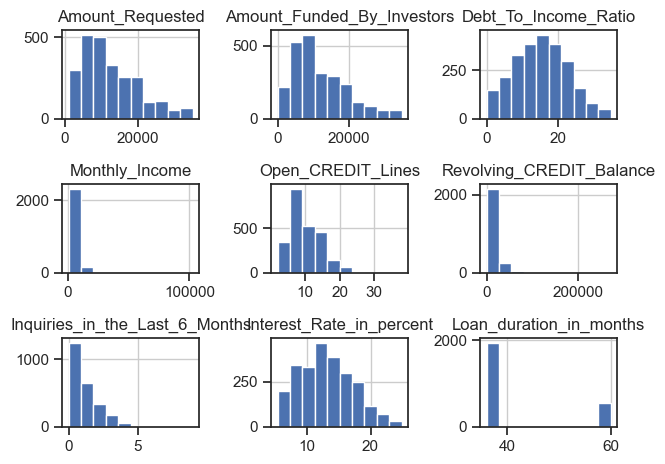

In [25]:
plt.figure(figsize = (20,8))
loan_data_continuous.hist()
plt.tight_layout()
plt.show()

### a. Intrest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [26]:
## Ho: There is no significant difference in interest rates charged for different loan amounts.
## Ha: Interest rates charged for high loan amounts are significantly lower than those charged for low loan amounts.

In [27]:
loan_data.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Interest_Rate_in_percent          float64
Loan_duration_in_months             int32
dtype: object

In [28]:
loan_data.Interest_Rate_in_percent = loan_data.Interest_Rate_in_percent.astype('float')
loan_data.Loan_duration_in_months = loan_data.Loan_duration_in_months.astype('int')

In [29]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount_Requested,2489.0,12409.923664,7806.747204,1000.00,6000.00,10000.00,17000.00,35000.00
Amount_Funded_By_Investors,2489.0,12004.754154,7748.534444,-0.01,6000.00,10000.00,16000.00,35000.00
Debt_To_Income_Ratio,2489.0,15.382186,7.507152,0.00,9.75,15.32,20.69,34.91
Monthly_Income,2489.0,5685.247300,3965.797049,588.50,3466.67,5000.00,6800.00,102750.00
Open_CREDIT_Lines,2489.0,10.074327,4.509246,2.00,7.00,9.00,13.00,38.00
Revolving_CREDIT_Balance,2489.0,15220.402170,18297.668558,0.00,5561.00,10944.00,18898.00,270800.00
Inquiries_in_the_Last_6_Months,2489.0,0.905585,1.231750,0.00,0.00,0.00,1.00,9.00
Interest_Rate_in_percent,2489.0,13.070912,4.177385,5.42,10.16,13.11,15.80,24.89
Loan_duration_in_months,2489.0,41.284050,9.946646,36.00,36.00,36.00,36.00,60.00


In [30]:
## using Pearson correlation test to check the relationship between interest rate and loan amount 
stats.pearsonr(loan_data.Interest_Rate_in_percent, loan_data.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.3358194064278588, pvalue=1.1396807200473959e-66)

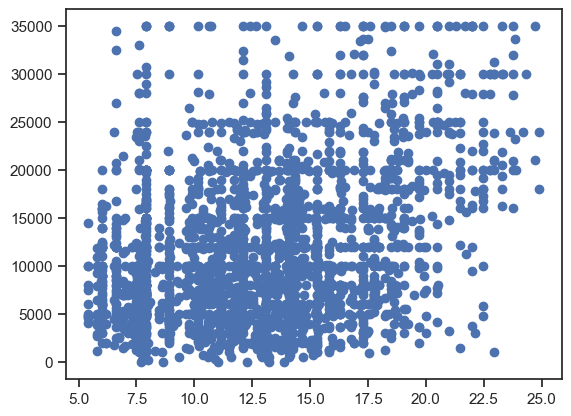

In [31]:
plt.scatter(loan_data.Interest_Rate_in_percent, loan_data.Amount_Funded_By_Investors)
plt.show()

<AxesSubplot:>

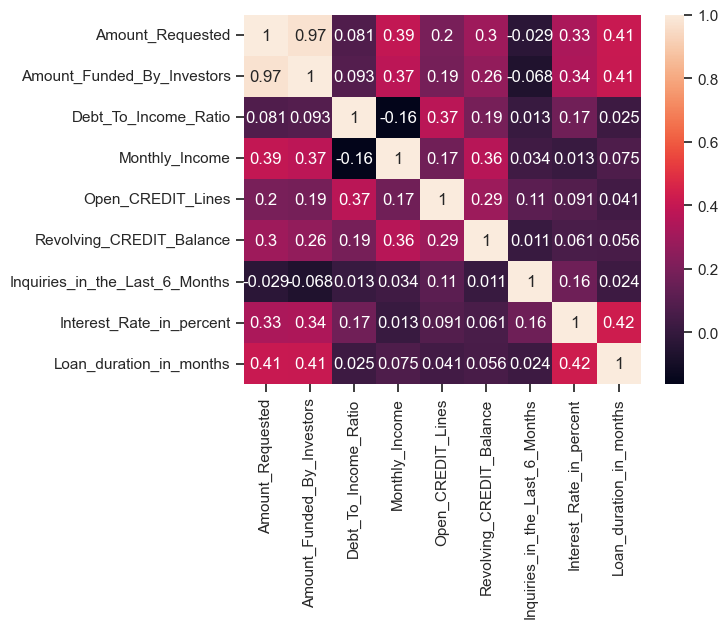

In [32]:
sns.heatmap(loan_data.corr(), annot = True)
plt.show()

## In this case, the computed correlation coefficient is 0.3358194064278588, which suggests that there is a moderate positive correlation between interest rate and loan amount. The p-value is 1.1396807200473959e-66, which is very small and indicates strong evidence against the null hypothesis (no significant difference in interest rates charged for different loan amounts). Therefore, we can conclude that there is a moderate positive correlation between the two variables being analyzed.

## b. Loan length is directly affecting interest rate.

In [33]:
## Null hypothesis (Ho): Loan duration has no significant effect on interest rate.
## Alternate hypothesis (Ha): There is a significant relationship between loan duration and interest rate,such that longer loan durations are associated with higher interest rates (positive correlation)

In [34]:
stats.pearsonr(loan_data.Interest_Rate_in_percent, loan_data.Loan_duration_in_months)

PearsonRResult(statistic=0.4244808110067465, pvalue=1.913234435148841e-109)

In [35]:
loan_data['loan_length'] = pd.cut(loan_data.Loan_duration_in_months,2, labels = ['less_duration', 'high_duration'])

In [36]:
loan_data.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate_in_percent,Loan_duration_in_months,loan_length
0,20000.0,20000.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,36,less_duration
1,19200.0,19200.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,36,less_duration
2,35000.0,35000.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,21.98,60,high_duration
3,10000.0,9975.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,9.99,36,less_duration
4,12000.0,12000.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,11.71,36,less_duration


In [37]:
loan_data.loan_length.value_counts()

less_duration    1941
high_duration     548
Name: loan_length, dtype: int64

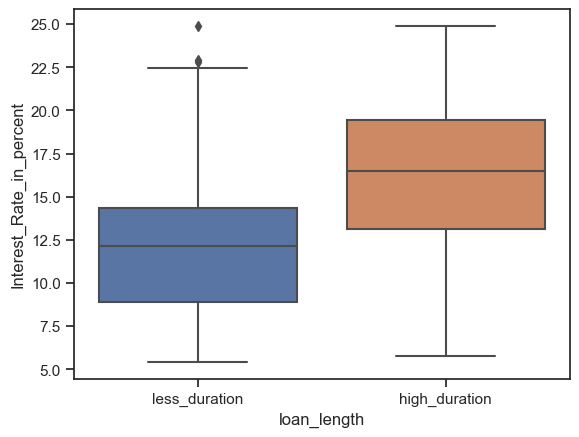

In [38]:
sns.boxplot(x = loan_data.loan_length, y = loan_data.Interest_Rate_in_percent, data = loan_data)
plt.show()

### From the above boxplot and and from the correlation coefficient which is 0.4244808110067465, we can suggests that there is a good positive correlation between loan length and interest rate. The interest rate is higher for higher duration of loan. As the p value is very low, hence we can reject the null hypothesis.

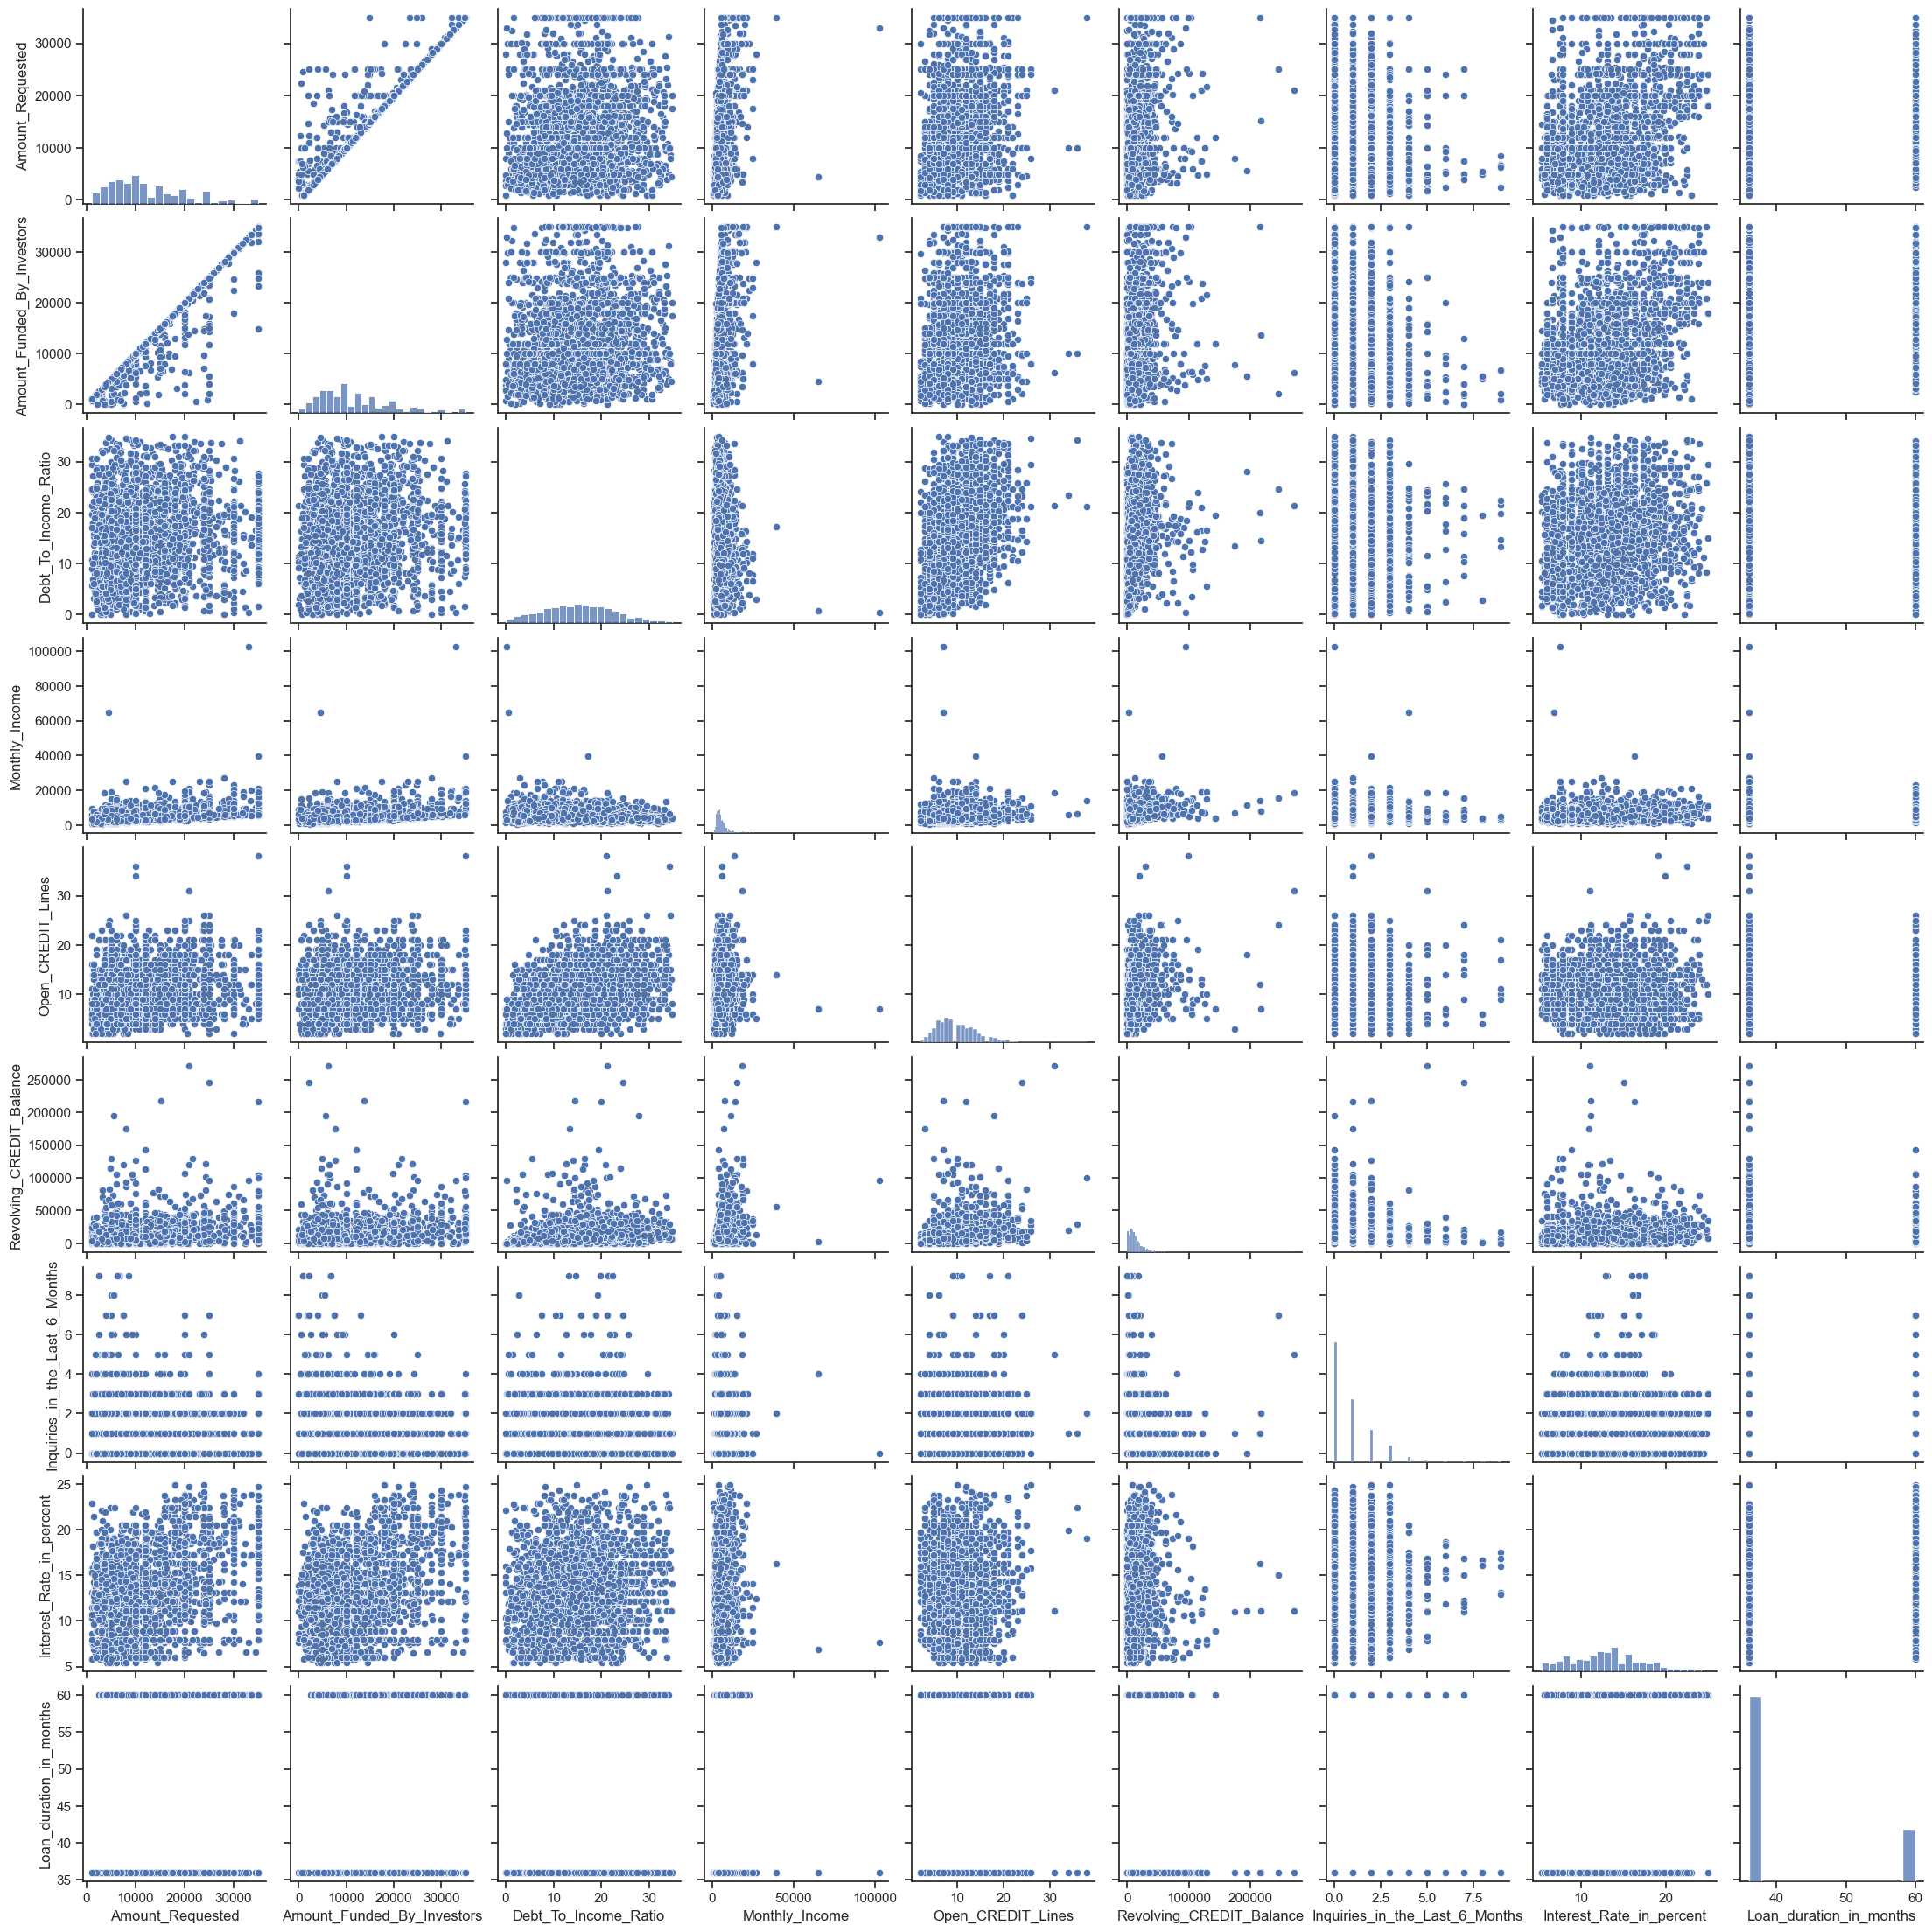

In [39]:
sns.pairplot(loan_data);

## c. Interest rate varies for different purpose of loans

In [42]:
## Ho: There is no significant difference in interest rates charged for loans with different purposes. 

## Ha: There is a significant difference in interest rates charged for loans with different purposes.

## CI = 95%

In [43]:
loan_data.Loan_Purpose.value_counts()

debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [44]:
loan_groups = loan_data.groupby('Loan_Purpose')[['Interest_Rate_in_percent']].mean().reset_index()

In [45]:
loan_groups

,Loan_Purpose,Interest_Rate_in_percent
0,car,11.113000
1,credit_card,13.050655
2,debt_consolidation,13.589147
3,educational,11.007333
4,home_improvement,11.594276
5,house,13.448000
6,major_purchase,10.797822
7,medical,11.649667
8,moving,13.621034
9,other,13.202814


In [46]:
loan_data.describe(include = 'object')

,Loan_Purpose,State,Home_Ownership,FICO_Range,Employment_Length
count,2489,2489,2489,2489,2413
unique,14,46,4,38,11
top,debt_consolidation,CA,MORTGAGE,670-674,10+ years
freq,1301,430,1144,170,649


In [48]:
stats.f_oneway(loan_data[loan_data['Loan_Purpose'] == 'car']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'credit_card']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'debt_consolidation']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'educational']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'home_improvement']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'house']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'major_purchase']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'medical']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'moving']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'other']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'renewable_energy']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'small_business']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'vacation']['Interest_Rate_in_percent'],
                           loan_data[loan_data['Loan_Purpose'] == 'wedding']['Interest_Rate_in_percent'])

F_onewayResult(statistic=7.487175499510106, pvalue=1.1346364693353598e-14)

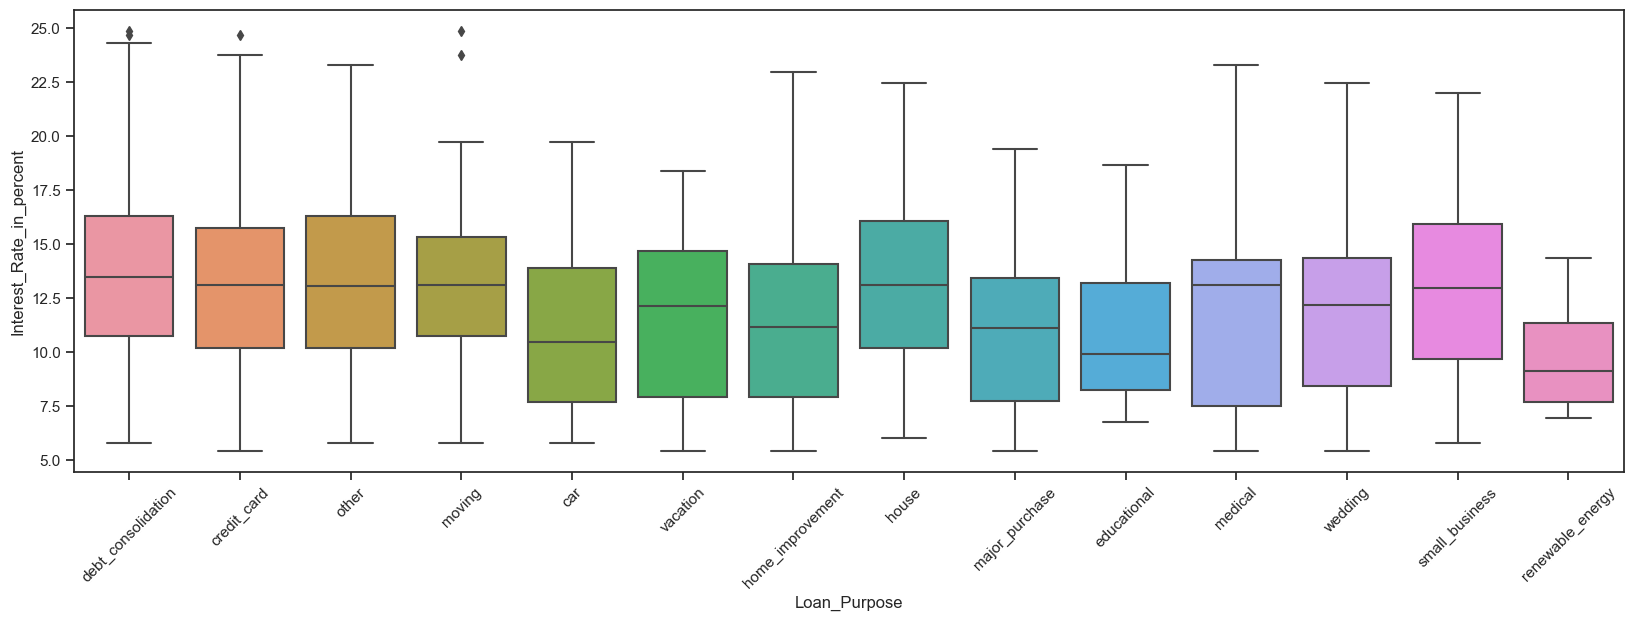

In [50]:
plt.figure(figsize = (20,6))
sns.boxplot(x = loan_data['Loan_Purpose'], y =loan_data['Interest_Rate_in_percent'],data = loan_data)
plt.xticks(rotation = 45);

### In this case, since the p-value is less than the significance level of 0.05 (pvalue=1.1346364693353598e-14 < 0.05), we can reject the null hypothesis that there is no significant difference in the interest rate of different purposes. Therefore, we can conclude that there is a significant difference between them.

## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [ ]:
## Ho: There is no significant relationship between FICO scores and Home Ownership. The mean FICO scores are the same for people who own homes and those who do not.

## Ha : There is a significant relationship between FICO scores and Home Ownership. People who own homes have higher mean FICO scores compared to those who do not.

## CI : 95%

In [51]:
loan_data.Home_Ownership.value_counts()

MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: Home_Ownership, dtype: int64

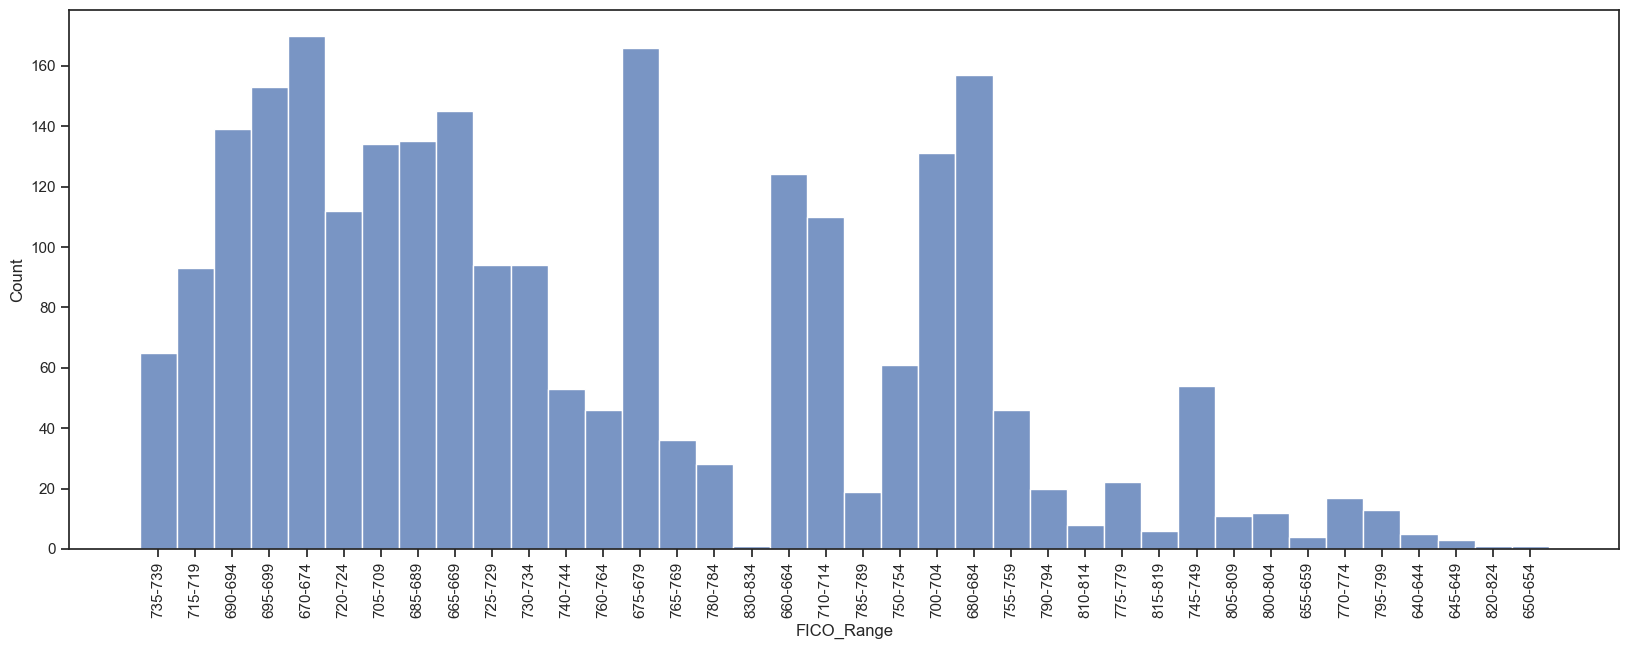

In [53]:
plt.figure(figsize = (20,7))
sns.histplot(loan_data.FICO_Range)
plt.xticks(rotation = 90);

In [66]:
## for analysis and checking relationship between FICO scores and home ownership, we have to first convert the FICO range 
## to single FICO value and then convert the dtype to 'int'.

In [67]:
loan_data.FICO_Range = loan_data.FICO_Range.str.replace("-", ",")

In [68]:
loan_data['FICO_Score'] = loan_data.FICO_Range.str.rpartition(",").loc[ : , 0]

In [70]:
loan_data.FICO_Score.head()

0    735
1    715
2    690
3    695
4    695
Name: FICO_Score, dtype: object

In [72]:
loan_data.FICO_Score.isna().sum()

0

In [71]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Amount_Requested                2489 non-null   float64 
 1   Amount_Funded_By_Investors      2489 non-null   float64 
 2   Loan_Purpose                    2489 non-null   object  
 3   Debt_To_Income_Ratio            2489 non-null   float64 
 4   State                           2489 non-null   object  
 5   Home_Ownership                  2489 non-null   object  
 6   Monthly_Income                  2489 non-null   float64 
 7   FICO_Range                      2489 non-null   object  
 8   Open_CREDIT_Lines               2489 non-null   float64 
 9   Revolving_CREDIT_Balance        2489 non-null   float64 
 10  Inquiries_in_the_Last_6_Months  2489 non-null   float64 
 11  Employment_Length               2413 non-null   object  
 12  Interest_Rate_in_per

In [59]:
loan_data.FICO_Score = loan_data.FICO_Score.fillna(loan_data.FICO_Score.mode()[0])

In [60]:
loan_data.FICO_Score.isnull().sum()

0

In [74]:
loan_data.FICO_Score = loan_data.FICO_Score.astype("int")

In [75]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Amount_Requested                2489 non-null   float64 
 1   Amount_Funded_By_Investors      2489 non-null   float64 
 2   Loan_Purpose                    2489 non-null   object  
 3   Debt_To_Income_Ratio            2489 non-null   float64 
 4   State                           2489 non-null   object  
 5   Home_Ownership                  2489 non-null   object  
 6   Monthly_Income                  2489 non-null   float64 
 7   FICO_Range                      2489 non-null   object  
 8   Open_CREDIT_Lines               2489 non-null   float64 
 9   Revolving_CREDIT_Balance        2489 non-null   float64 
 10  Inquiries_in_the_Last_6_Months  2489 non-null   float64 
 11  Employment_Length               2413 non-null   object  
 12  Interest_Rate_in_per

In [82]:
fico_own = loan_data.loc[loan_data['Home_Ownership'] == 'OWN', 'FICO_Score' ]
fico_own.head()

5     670
34    675
54    680
59    755
73    665
Name: FICO_Score, dtype: int32

In [83]:
fico_rent = loan_data.loc[loan_data['Home_Ownership'] == 'RENT', 'FICO_Score' ]
fico_rent.head()

4     695
6     720
8     685
9     715
10    670
Name: FICO_Score, dtype: int32

In [87]:
## we need to perform two-sample t-test to check the relationship
t_stat, p_value = stats.ttest_ind(fico_own, fico_rent)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.5885742255466804
p-value: 0.009741875070081021


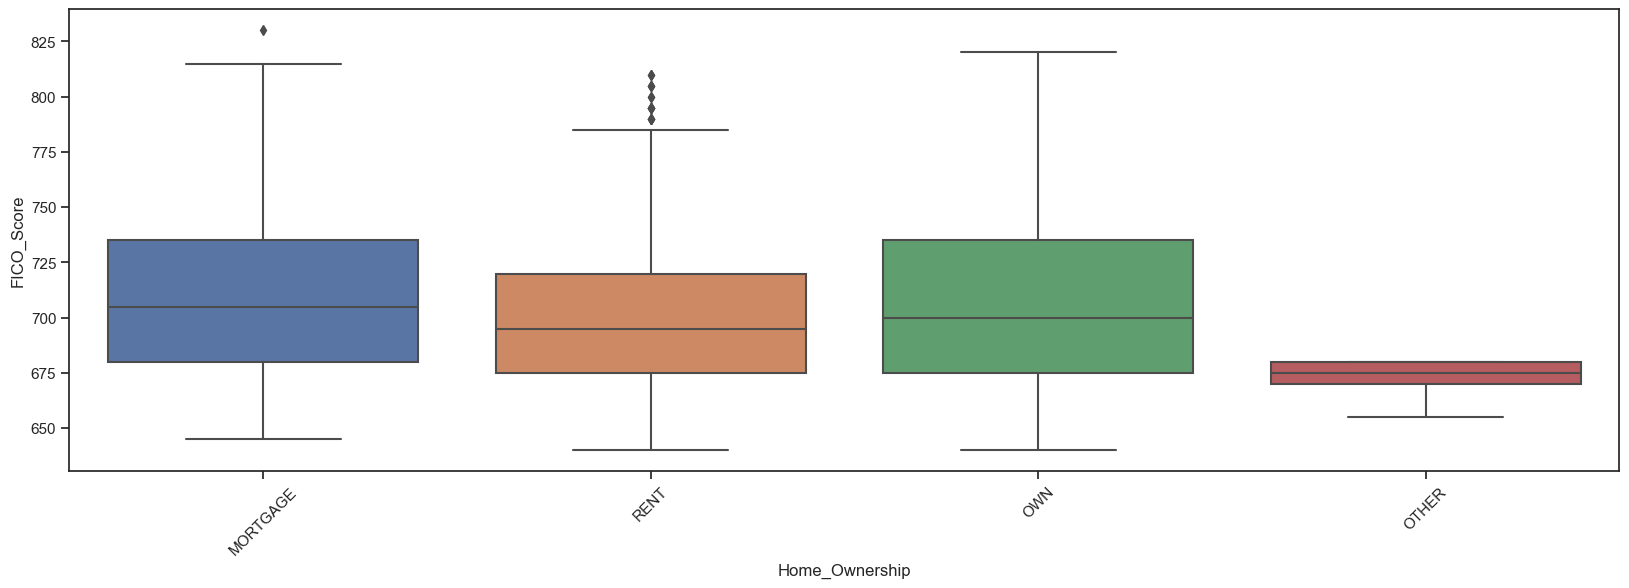

In [76]:
plt.figure(figsize = (20,6))
sns.boxplot(x = loan_data.Home_Ownership, y = loan_data.FICO_Score, data = loan_data)
plt.xticks(rotation = 45);

### From the above t-test , the p-value is less than 0.05, hence we reject the null hypothesis and conclude that there is a significant relationship between FICO scores and Home Ownership. From the above box-plot it is clearly seen that FICO scores are higher for those who own a home that those who don't. 

## BUSINESS PROBLEM-2

In [4]:
price_quote = pd.read_csv("Price_Quotes.csv")
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


## BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [ ]:
## Ho: There is no difference in the average price quotes provided by Mary and Barry.
## Ha : There is a difference in the average price quotes provided by Mary and Barry.
## CI : 95%
## Alpha region - 0.05


In [91]:
## We can perform the two-sample t-test

stats.ttest_ind(price_quote.Barry_Price,price_quote.Barry_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

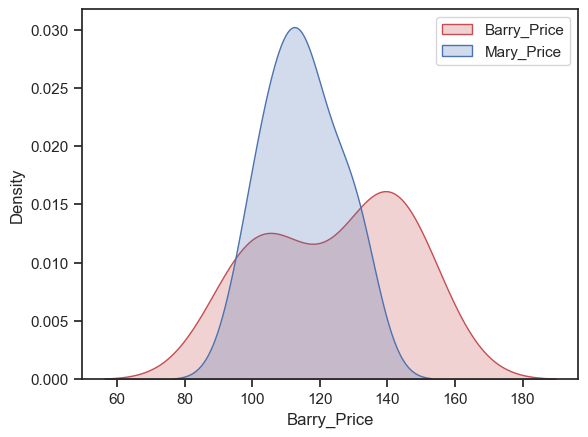

In [10]:
fig = sns.kdeplot(price_quote['Barry_Price'], shade=True, color="r", label = 'Barry_Price')
fig = sns.kdeplot(price_quote['Mary_Price'], shade=True, color="b", label = 'Mary_Price')
plt.legend()
plt.show()

In [102]:
## By comparing the two KDEs, we can visually assess if there is any difference in the average price quotes provided by Mary and Barry.Here, the two KDEs are overlapping, it suggests that there is no significant difference in their price quotes.

### The p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant difference in the average price quotes provided by Mary and Barry.

## BUSINESS PROBLEM-3

In [2]:
treatment_facility = pd.read_csv("Treatment_Facility.csv")
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [11]:
treatment_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [34]:
treatment_facility.rename(columns = {'VAR4' : 'TRFF', 'VAR5' : 'CI'}, inplace = True)

## BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

## Employee turnover rate Vs Reengineer

In [39]:
## Null hypothesis (Ho): The reengineering effort did not have significant effect on the employee turnover rate.

## Alternate hypothesis (Ha): The reengineering effort has a significant effect on the employee turnover rate.

## CI : 95%

## significance level : 0.05

In [17]:
employee_prior = treatment_facility.loc[treatment_facility.Reengineer == 'Prior', 'Employee_Turnover']
employee_prior.head()

0     0.0000
1     6.0606
2    12.1212
3     3.3333
4    12.9032
Name: Employee_Turnover, dtype: float64

In [18]:
employee_post = treatment_facility.loc[treatment_facility.Reengineer == 'Post', 'Employee_Turnover']
employee_post.head()

13    26.6667
14    17.9487
15    12.8205
16    15.7895
17     0.0000
Name: Employee_Turnover, dtype: float64

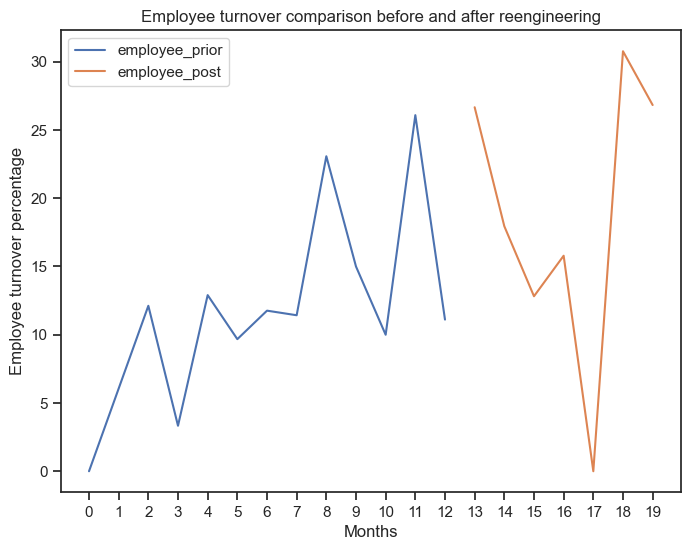

In [41]:
plt.figure(figsize = (8,6))
plt.plot(employee_prior, label = 'employee_prior')
plt.plot(employee_post, label = 'employee_post')
plt.legend()
plt.title('Employee turnover comparison before and after reengineering')
plt.xlabel('Months')
plt.ylabel("Employee turnover percentage")
plt.xticks(range(20))
plt.show()

In [29]:
## We can use a two-sample t-test to compare the mean values of employee turnover rate before and after the reengineering effort.
stats.ttest_ind(employee_prior, employee_post)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

### Here the p-value is 0.093 which is greater than the significance level (0.05), we would fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the reengineering effort had an effect on the Employee turnover rate.

## Critical incident rate Vs Reengineer

In [ ]:
## Ho: The critical incidence rate before and after the reengineering effort is the same.
## Ha: The critical incidence rate after the reengineering effort is lower than the critical incidence rate before the reengineering effort

In [31]:
## We can use a two-sample t-test to compare the mean values of critical incident rate before and after the reengineering effort.


In [35]:
ci_prior = treatment_facility.loc[treatment_facility.Reengineer == 'Prior', 'CI']
ci_prior.head()

0     42.682927
1     25.806452
2    146.198830
3    110.429448
4     23.952096
Name: CI, dtype: float64

In [36]:
ci_post = treatment_facility.loc[treatment_facility.Reengineer == 'Post', 'CI']
ci_post.head()

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
Name: CI, dtype: float64

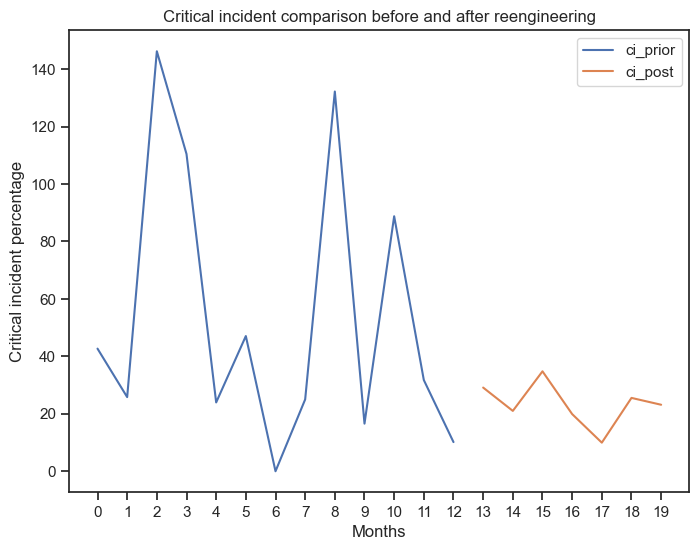

In [42]:
plt.figure(figsize = (8,6))
plt.plot(ci_prior, label = 'ci_prior')
plt.plot(ci_post, label = 'ci_post')
plt.legend()
plt.title('Critical incident comparison before and after reengineering')
plt.xlabel('Months')
plt.ylabel("Critical incident percentage")
plt.xticks(range(20))
plt.show()

In [38]:
## We can use a two-sample t-test to compare the mean values of critical incident rate before and after the reengineering effort.

stats.ttest_ind(ci_prior, ci_post)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

### Based on the graphical analysis, if it is clear that there has been a reduction in critical incidents after the reengineering effort, but statistically, after performing t-test, we got p value of 0.121 which suggests that there is not enough evidence to reject the null hypothesis that there is no difference in the mean values of critical incidents before and after the reengineering effort. It may be worth further investigating the data and looking at other factors that could be influencing the results.

## TRFF rate Vs Reengineer

In [ ]:
## Ho: The TRFF percentage before and after the reengineering effort is the same.
## Ha: The TRFF percentage after the reengineering effort is lower than the TRFF percentage before the reengineering effort

## CI : 95%
## p-critical : 0.05

In [58]:
TRFF_prior = treatment_facility.loc[treatment_facility.Reengineer == 'Prior', 'TRFF']
TRFF_prior.head()

0    24.390244
1    19.354839
2    35.087719
3    18.404908
4    17.964072
Name: TRFF, dtype: float64

In [59]:
TRFF_post = treatment_facility.loc[treatment_facility.Reengineer == 'Post', 'TRFF']
TRFF_post.head()

13     9.708738
14     4.201681
15    13.043478
16     9.950249
17     9.950249
Name: TRFF, dtype: float64

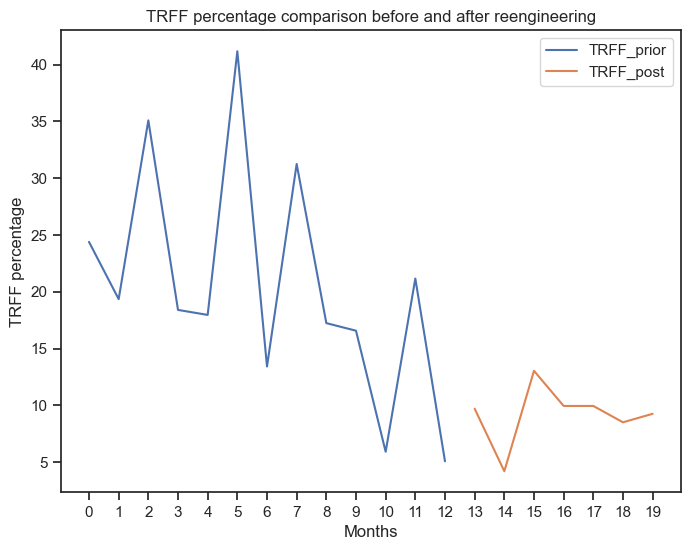

In [61]:
plt.figure(figsize = (8,6))
plt.plot(TRFF_prior, label = 'TRFF_prior')
plt.plot(TRFF_post, label = 'TRFF_post')
plt.legend()
plt.title('TRFF percentage comparison before and after reengineering')
plt.xlabel('Months')
plt.ylabel("TRFF percentage")
plt.xticks(range(20))
plt.show()

In [62]:
## performing two sample t-test
stats.ttest_ind(TRFF_prior, TRFF_post)

Ttest_indResult(statistic=2.783398448880451, pvalue=0.012265082138734354)

### The two-sample t-test for the TRFF data shows a statistic of 2.783 and a p-value of 0.012. The p-value is less than the significance level of 0.05, which means we can reject the null hypothesis that there is no significant difference between the mean values of TRFF before and after the reengineering effort. The same can be graphically seen that there is a significant reduction in TRFF percentage after reengineering efforts.

## BUSINESS PROBLEM-4

In [100]:
priority_assessment = pd.read_csv("Priority_Assessment.csv")
priority_assessment.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [101]:
priority_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [102]:
priority_assessment.shape

(642, 2)

In [103]:
priority_assessment.isnull().sum()

Days        0
Priority    0
dtype: int64

In [105]:
priority_assessment.loc[~priority_assessment.duplicated()]

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
597,4.3,Medium
599,4.3,High
613,7.9,Low
629,26.4,High


In [106]:
priority_assessment.describe().T

,count,mean,std,min,25%,50%,75%,max
Days,642.0,2.946262,6.687063,0.1,0.2,0.6,2.5,72.9


In [110]:
def outlier_treatment(x):
    lower = x.quantile(0.10)
    upper = x.quantile(0.90)
    
    return x.clip(lower, upper)

In [111]:
priority_assessment['Days'] = outlier_treatment(priority_assessment.Days)

In [112]:
priority_assessment.describe().T

,count,mean,std,min,25%,50%,75%,max
Days,642.0,1.95405,2.601978,0.1,0.2,0.6,2.5,8.0


### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [ ]:
## Ho : There is no significant difference between the average completion time of high, medium, and low priority jobs. 
## Ha : The alternative hypothesis is that there is a significant difference.


In [113]:
## we will perform ANOVA test to judge this. for that we will filter the data based on 'High', 'Medium' & 'Low' priority.

High = priority_assessment.loc[priority_assessment.Priority == 'High', 'Days']
Medium = priority_assessment.loc[priority_assessment.Priority == 'Medium', 'Days']
Low = priority_assessment.loc[priority_assessment.Priority == 'Low', 'Days']

In [114]:
stats.f_oneway(High, Medium, Low)

F_onewayResult(statistic=4.506519355849362, pvalue=0.011389845621338676)

In [122]:
print("High priority jobs mean completion time : ", round(High.mean(), 2), "Days")
print("Medium priority jobs mean completion time : ", round(Medium.mean(), 2), "Days")
print("Low priority jobs mean completion time : ", round(Low.mean(), 2), "Days")

High priority jobs mean completion time :  1.89 Days
Medium priority jobs mean completion time :  1.8 Days
Low priority jobs mean completion time :  2.84 Days


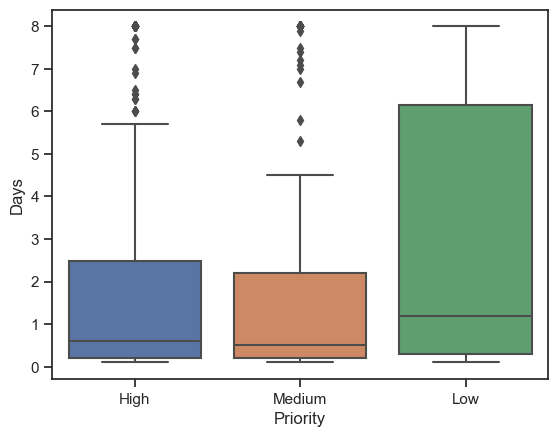

In [116]:
sns.boxplot(x = priority_assessment.Priority, y = priority_assessment.Days)
plt.show()

### Based on the one-way ANOVA test, we can see that the p-value is less than the alpha value of 0.05, indicating that there is significant evidence to reject the null hypothesis. This means that there is a statistically significant difference in completion time among the three priority levels.

### From above calculations, it can be seen that mean completion time for 'High' priority jobs is somewhat higher than that of 'Medium' priority jobs. Mean completion time for 'Low' priority jobs is higher that both 'High' and 'Medium' priority jobs.

## BUSINESS PROBLEM-5

In [31]:
films = pd.read_csv("Films.csv")
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [32]:
films.drop(columns = '_rowstate_', inplace = True)

In [33]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           330 non-null    object 
 1   Gender          330 non-null    object 
 2   Marital_Status  328 non-null    object 
 3   Sinage          328 non-null    float64
 4   Parking         328 non-null    float64
 5   Clean           327 non-null    float64
 6   Overall         328 non-null    float64
 7   Age             328 non-null    float64
 8   Income          314 non-null    float64
 9   Hear_About      323 non-null    object 
dtypes: float64(6), object(4)
memory usage: 25.9+ KB


In [34]:
films.shape

(330, 10)

In [35]:
print(films.Gender.value_counts())
print(films.Marital_Status.value_counts())

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64
2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64


In [36]:
films['Gender'] = np.where((films.Gender == 'Male') | (films.Gender == '1') , 'Male', 'Female')
films['Marital_Status'] = np.where((films.Marital_Status == 'Married') | (films.Marital_Status == '1') , 'Married', 'Single')

In [37]:
films

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [38]:
print(films.Gender.value_counts())
print(films.Marital_Status.value_counts())

Female    213
Male      117
Name: Gender, dtype: int64
Single     230
Married    100
Name: Marital_Status, dtype: int64


In [9]:
films.drop_duplicates(inplace = True, ignore_index = True)

In [10]:
films.isna().sum()

Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            14
Hear_About         7
dtype: int64

In [11]:
for col in films.columns:
    films[col].fillna(films[col].mode()[0], inplace = True)

In [12]:
films.isna().sum()

Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [13]:
films.describe().T

,count,mean,std,min,25%,50%,75%,max
Sinage,251.0,1.960159,0.875446,1.0,1.0,2.0,2.0,5.0
Parking,251.0,1.812749,0.858369,1.0,1.0,2.0,2.0,5.0
Clean,251.0,1.721116,0.760205,1.0,1.0,2.0,2.0,5.0
Overall,251.0,1.633466,0.738319,1.0,1.0,2.0,2.0,5.0
Age,251.0,2.358566,0.697794,1.0,2.0,2.0,3.0,4.0
Income,251.0,1.788845,0.838591,1.0,1.0,2.0,3.0,3.0


In [15]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           251 non-null    object 
 1   Gender          251 non-null    object 
 2   Marital_Status  251 non-null    object 
 3   Sinage          251 non-null    float64
 4   Parking         251 non-null    float64
 5   Clean           251 non-null    float64
 6   Overall         251 non-null    float64
 7   Age             251 non-null    float64
 8   Income          251 non-null    float64
 9   Hear_About      251 non-null    object 
dtypes: float64(6), object(4)
memory usage: 19.7+ KB


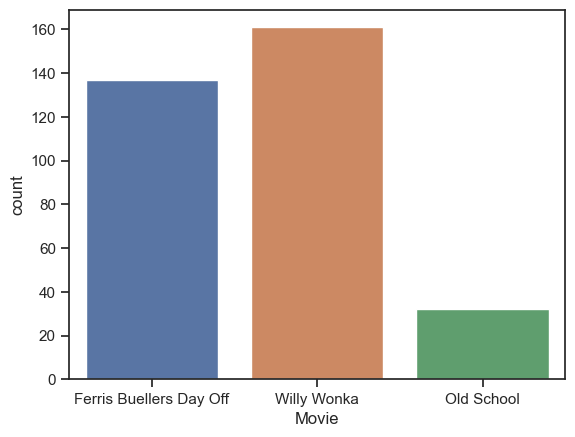

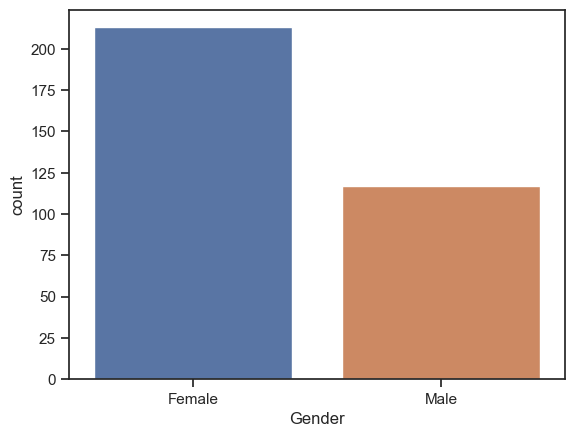

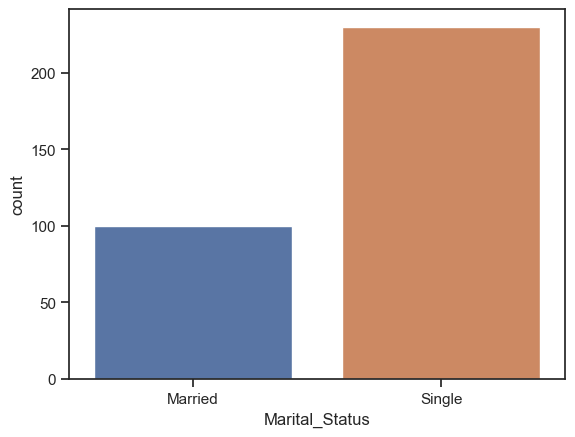

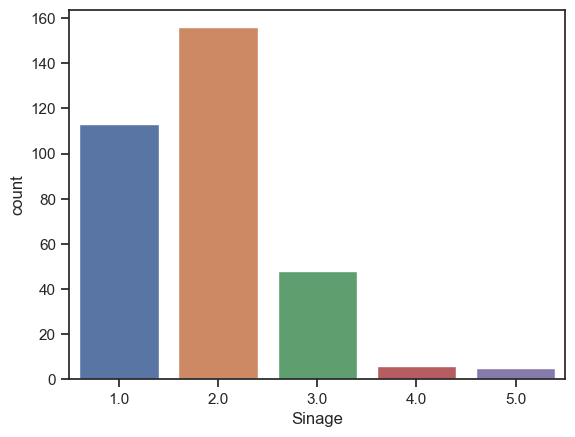

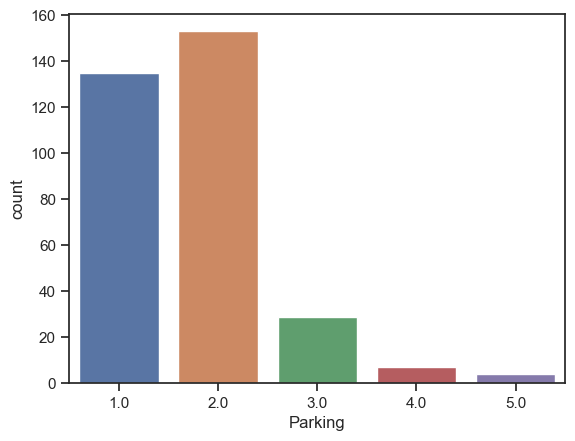

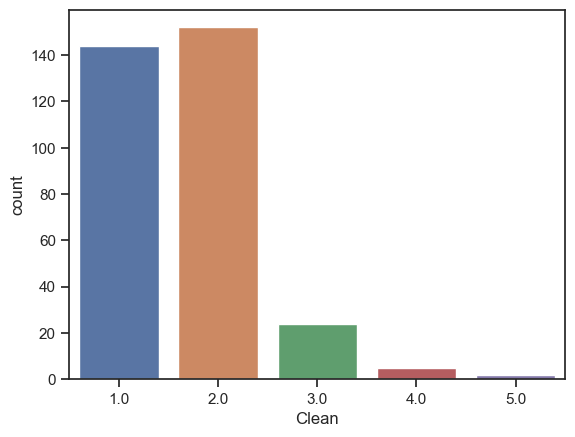

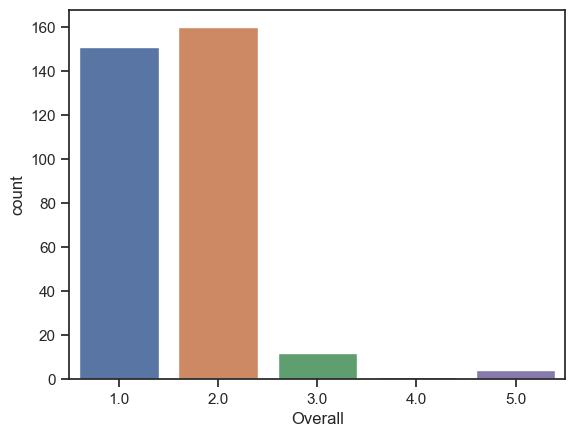

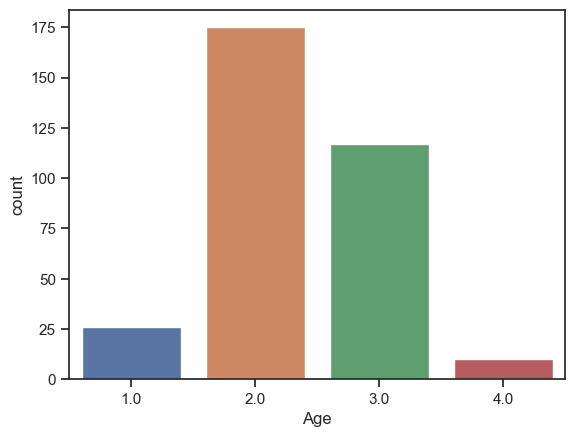

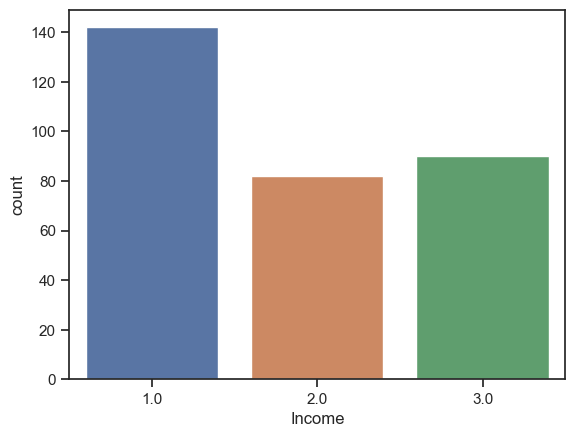

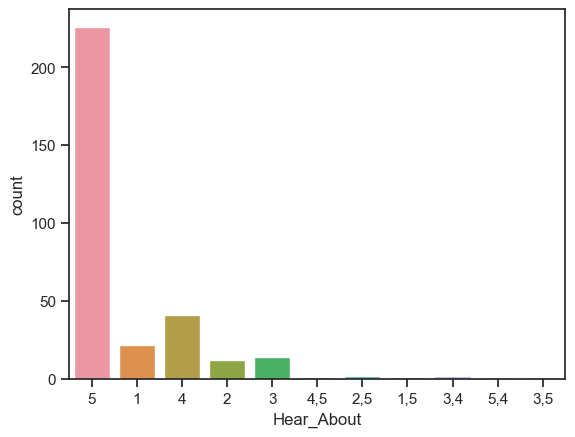

In [39]:
for col in films.columns:
    sns.countplot(x = films[col], data = films)
    plt.show()

## BUSINESS PROBLEM: Use the survey results to address the following questions
### a. What is the overall level of customer satisfaction?

In [17]:
signage_mean = films['Sinage'].mean()
parking_mean = films['Parking'].mean()
clean_mean = films['Clean'].mean()
overall_mean = films['Overall'].mean()


overall_satisfaction_mean = (signage_mean + parking_mean + clean_mean + overall_mean) / 4

print("Overall level of customer satisfaction:", overall_satisfaction_mean)

Overall level of customer satisfaction: 1.7818725099601596


<AxesSubplot:xlabel='Overall', ylabel='Density'>

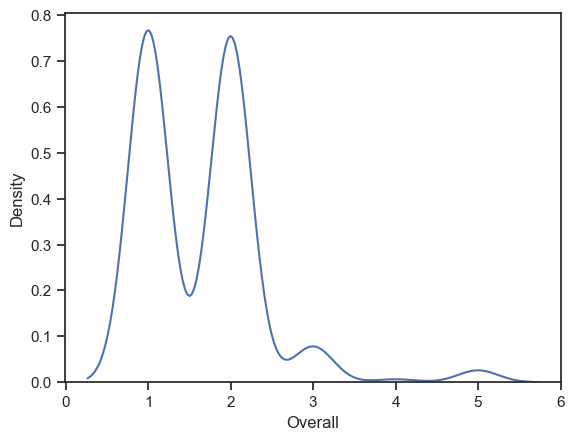

In [27]:
sns.kdeplot(films.Overall)
plt.show()

### b. What factors are linked to satisfaction?

In [45]:
films.head()

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1


In [73]:
(films.Overall.value_counts(normalize = True) * 100)

1.0    47.011952
2.0    46.215139
3.0     4.780876
5.0     1.593625
4.0     0.398406
Name: Overall, dtype: float64

In [18]:
films.describe(include = 'object')

,Movie,Gender,Marital_Status,Hear_About
count,251,251,251,251
unique,3,2,2,11
top,Willy Wonka,2,2,5
freq,116,239,239,163


In [78]:
 pd.crosstab ( films.Overall, films.Sinage)

Sinage,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,61,41,12,2,2
2.0,18,71,21,4,2
3.0,0,4,8,0,0
4.0,0,0,1,0,0
5.0,1,1,1,0,1


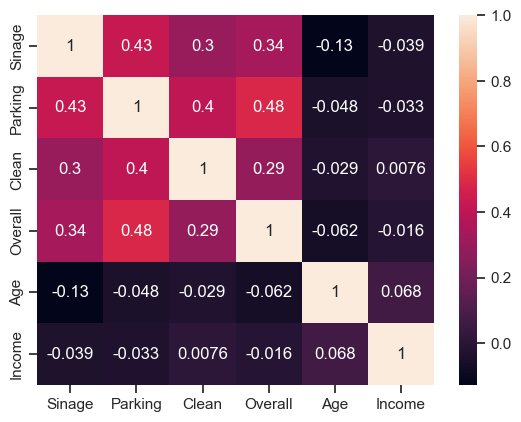

In [20]:
sns.heatmap(films.corr(), annot = True)
plt.show()

## It can be seen from the correlation matrix that Parking, Cleaning and Sinage are the main factors linked to overall satisfaction level. 

## c. What is the demographic profile of Film on the Rocks patrons?

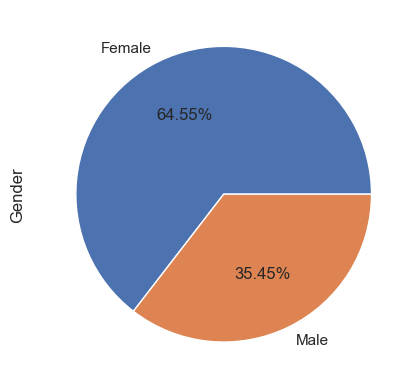

In [43]:
## Gender
films.Gender.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

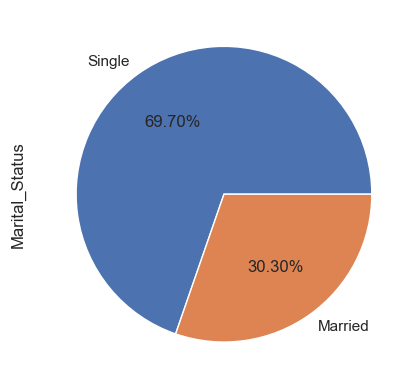

In [46]:
## Marital Status
films.Marital_Status.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

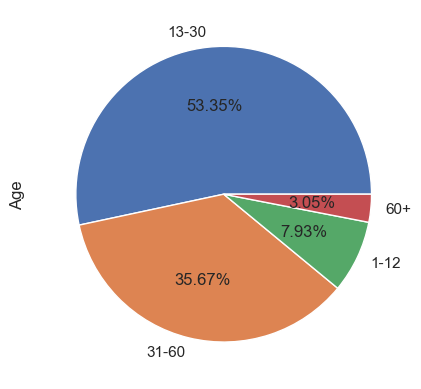

In [48]:
## Age
films.Age.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', labels=['13-30','31-60','1-12','60+'])
plt.show()

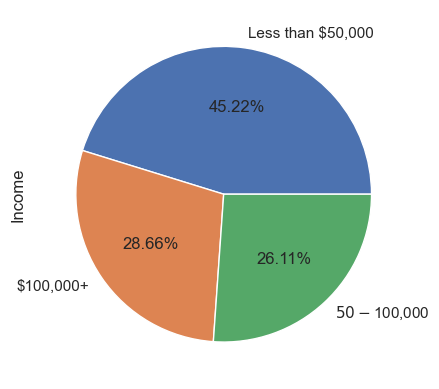

In [49]:
## Income
films.Income.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', labels = ['Less than $50,000','$100,000+','$50-$100,000'])
plt.show()


## d. In what media outlet(s) should the film series be advertised?

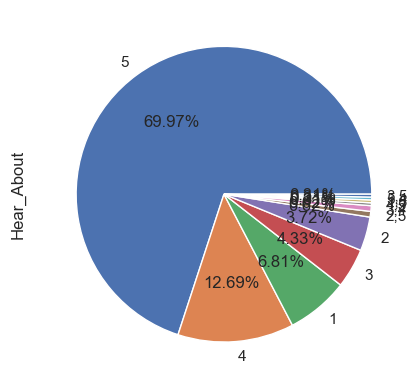

In [54]:
films.Hear_About.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

### Clearly we can see from above pie chart that about 70 % of total said they heard about the film series solely through word of mouth. The traditional media outlets (newspapers, radio, and television) were among the least effective with regard to getting the word out among these respondents.
### For this particular market, word of mouth seems to be an important outlet, determining how to take advantage of this vehicle for communication should be the next step in getting the word out about the film series. Forms of social media, such as Twitter and Facebook and other influencing social media platform might prove to be important vehicles for word of mouth communication.